In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Inputting my recorded times of leaving the house and when I went to bed the previous night

house_leaving_times = [9.2, 8.55, 8.4, 9.1, 11.0, 9.05, 8.5]  # Time leaving the house (hours)
bedtimes = [23.0, 22.3, 22.25, 23.0, 22.50, 23.25, 23.5]  # Time went to bed (hours)

In [3]:
# Calculate average and standard deviation

leave_avg = np.mean(house_leaving_times)
leave_std = np.std(house_leaving_times)
bedtime_avg = np.mean(bedtimes)
bedtime_std = np.std(bedtimes)

In [4]:
# Generate synthetic data points using normal distribution
# I want 100 new data points for each
synthetic_leave_times = np.random.normal(loc=leave_avg, scale=leave_std, size=100)
synthetic_bedtimes = np.random.normal(loc=bedtime_avg, scale=bedtime_std, size=100)

In [5]:
# Combine into a dataframe 
data = pd.DataFrame({
    'leave_time': synthetic_leave_times,
    'bedtime': synthetic_bedtimes
})

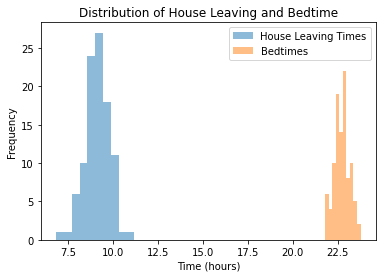

In [6]:
# Plot the data distribution

plt.hist(data['leave_time'], bins=10, alpha=0.5, label='House Leaving Times')
plt.hist(data['bedtime'], bins=10, alpha=0.5, label='Bedtimes')
plt.legend(loc='upper right')
plt.xlabel('Time (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of House Leaving and Bedtime')
plt.show()

In [7]:
from scipy.stats import pearsonr
from statsmodels.tsa.arima.model import ARIMA

In [8]:
#Calculate correlation

correlation, _ = pearsonr(house_leaving_times, bedtimes)

In [9]:
# Time-Series Forecasting
# I want to forecast the next 5 days for bedtimes and house-leaving times
def forecast_next_week(data):
    model = ARIMA(data, order=(1,1,1))  # Basic ARIMA model
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=5)  # Predict next 5 days
    return forecast

In [10]:
# For house-leaving times and bedtimes

house_leave_forecast = forecast_next_week(house_leaving_times)
bedtime_forecast = forecast_next_week(bedtimes)

C:\Users\Ella Schlaghecke\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ella Schlaghecke\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [11]:
# Output results

correlation, house_leave_forecast, bedtime_forecast

(-0.1292963673786237,
 array([8.9678288 , 9.06794739, 9.08937345, 9.09395878, 9.09494007]),
 array([23.30171288, 23.31809284, 23.31673974, 23.31685151, 23.31684228]))

**Based on my past week's data, these are the predicted times for the next 5 days:
House-Leaving Times (in hours):**

* Day 1: 8.97
* Day 2: 9.07
* Day 3: 9.09
* Day 4: 9.09
* Day 5: 9.09

**Bedtimes (in hours):**

* Day 1: 23.30
* Day 2: 23.32
* Day 3: 23.32
* Day 4: 23.32
* Day 5: 23.32

**The forecasts suggest that my house-leaving times and bedtimes may remain relatively consistent within the upcoming days.**

#### Correlation Analysis:
The correlation between my house-leaving times and bedtimes is around -0.13, which suggests a very weak (and slightly negative) relationship. This means based on this data, there is little to no correlation between the time I leave the house and the time I go to bed.